# Exam Room Allocation problem - Preprocessing + EDA

In [82]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing Exam Room Data


In [83]:
#read csv files
dfRooms = pd.read_csv('https://raw.githubusercontent.com/r6541/schedule_UOS/main/exam_room.csv')
dfRooms.head(5)

,Location,Seat
0,M10-002,29
1,M10-004D,28
2,M10-008,30
3,M10-010,29
4,M10-101D,30


#### Fixing the columns of the dataframe
add building and room + split location

In [84]:
exam_rooms = pd.DataFrame(dfRooms)
exam_rooms['Building'] = ''
exam_rooms['Room'] = ''

# Iterate over the rows
for i, r in exam_rooms.iterrows():
    value = str(r['Location'])  # Treat the value as a string
    if '-' in value:
        parts = value.split('-')
    elif ' ' in value:
        parts = value.split(' ')
    else:
        parts = [value, '']  # If no delimiter is found, use the whole value and an empty string
    exam_rooms.at[i, 'Building'] = parts[0]
    exam_rooms.at[i, 'Room'] = parts[1]

print(exam_rooms.head(5))

   Location  Seat Building  Room
0   M10-002    29      M10   002
1  M10-004D    28      M10  004D
2   M10-008    30      M10   008
3   M10-010    29      M10   010
4  M10-101D    30      M10  101D


In [85]:
#exam_rooms.drop(columns=['Location'], inplace=True)
#exam_rooms.head()

In [86]:
Seat = exam_rooms.pop('Seat')

exam_rooms['Capacity'] = Seat
print(exam_rooms)

      Location Building  Room  Capacity
0      M10-002      M10   002        29
1     M10-004D      M10  004D        28
2      M10-008      M10   008        30
3      M10-010      M10   010        29
4     M10-101D      M10  101D        30
..         ...      ...   ...       ...
126  M23 - 151     M23    151       100
127  M23 - 108     M23    108        75
128   M23 - 22     M23     22        72
129   M23 - 23     M23     23        70
130     W2-001       W2   001       300

[131 rows x 4 columns]


In [87]:
exam_rooms.dropna(how='all', inplace = True)
print(exam_rooms)

      Location Building  Room  Capacity
0      M10-002      M10   002        29
1     M10-004D      M10  004D        28
2      M10-008      M10   008        30
3      M10-010      M10   010        29
4     M10-101D      M10  101D        30
..         ...      ...   ...       ...
126  M23 - 151     M23    151       100
127  M23 - 108     M23    108        75
128   M23 - 22     M23     22        72
129   M23 - 23     M23     23        70
130     W2-001       W2   001       300

[131 rows x 4 columns]


###EDA

In [88]:
# group the data by the building in exam_rooms and sort based on number of times

grouped_data = exam_rooms.groupby('Building').size().sort_values(ascending=True)
print(grouped_data)


Building
M2       1
M9       1
W2       1
M5       2
W5       2
W9       2
W8       3
M6       5
M31      9
M4      11
W10     14
W4      14
M10     15
M3      16
M1      17
M23     18
dtype: int64


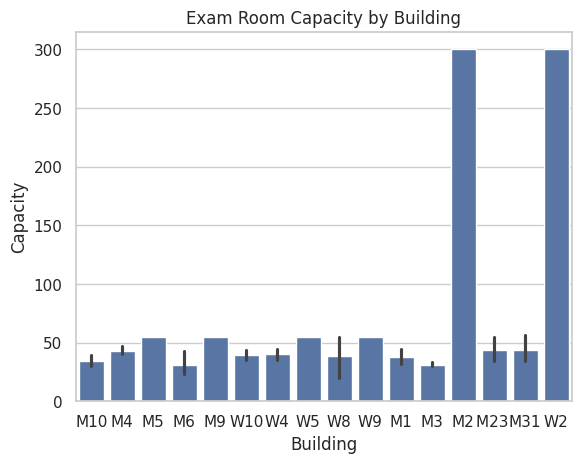

In [89]:
#create bargraph of exam_rooms use seaborn

sns.barplot(x = 'Building', y = 'Capacity', data = exam_rooms)
plt.title('Exam Room Capacity by Building')
plt.show()


In [90]:
room_capacity_stats = exam_rooms['Capacity'].describe()
print(room_capacity_stats)


count    131.000000
mean      43.282443
std       34.922172
min       16.000000
25%       30.000000
50%       37.000000
75%       44.000000
max      300.000000
Name: Capacity, dtype: float64


##Preprocessing Final Exam Spring 2024 data

In [106]:
exams = pd.read_csv('https://raw.githubusercontent.com/r6541/schedule_UOS/main/Exams.csv')
exams.dropna(how='all', inplace = True)
print(exams)

      COL  DEPT    CRN   CRS_NO                           TITLE SECT TYPE_  \
0       3  BUSP  20675   302250   Legal Environment of Business   53   LEC   
1      14  BIOT  20567  1450301                 Bio-informatics  53L   LAB   
2      14  BIOT  20564  1450301                 Bio-informatics  11L   LAB   
3      14  BIOT  20558  1450421             Plant Biotechnology  13L   LAB   
4      14  BIOT  20559  1450421             Plant Biotechnology  11L   LAB   
...   ...   ...    ...      ...                             ...  ...   ...   
2193    6  PBLW  20949   602347                  Public Finance   51   LEC   
2194   14  APHY  20743  1430106                Remedial Physics  52Z   LEC   
2195    6  PBLW  20876   602271  Princpl of Admin Law &Pub Func    1   LEC   
2196   14  APHY  20828  1460224                Regional Geology   11   LEC   
2197    5  NURS  20927   503261  Psychosocial Aspects/ Hth Prof   71   LEC   

     CAMP  ENROL INSTR_ID                            INSTRUCTOR

In [107]:
# prompt: add id column as first column to exams

exams.insert(0, 'id', range(1, 1 + len(exams)))
print(exams)


        id  COL  DEPT    CRN   CRS_NO                           TITLE SECT  \
0        1    3  BUSP  20675   302250   Legal Environment of Business   53   
1        2   14  BIOT  20567  1450301                 Bio-informatics  53L   
2        3   14  BIOT  20564  1450301                 Bio-informatics  11L   
3        4   14  BIOT  20558  1450421             Plant Biotechnology  13L   
4        5   14  BIOT  20559  1450421             Plant Biotechnology  11L   
...    ...  ...   ...    ...      ...                             ...  ...   
2193  2194    6  PBLW  20949   602347                  Public Finance   51   
2194  2195   14  APHY  20743  1430106                Remedial Physics  52Z   
2195  2196    6  PBLW  20876   602271  Princpl of Admin Law &Pub Func    1   
2196  2197   14  APHY  20828  1460224                Regional Geology   11   
2197  2198    5  NURS  20927   503261  Psychosocial Aspects/ Hth Prof   71   

     TYPE_ CAMP  ENROL INSTR_ID                            INST

In [109]:
print(exams.columns)

Index(['id', 'COL', 'DEPT', 'CRN', 'CRS_NO', 'TITLE', 'SECT', 'TYPE_', 'CAMP',
       'ENROL', 'INSTR_ID', 'INSTRUCTOR', 'EXAM_DATE', 'START_TIME',
       'END_TIME', 'COURSE_TYPE', 'COURSE_CLASS'],
      dtype='object')


### EDA

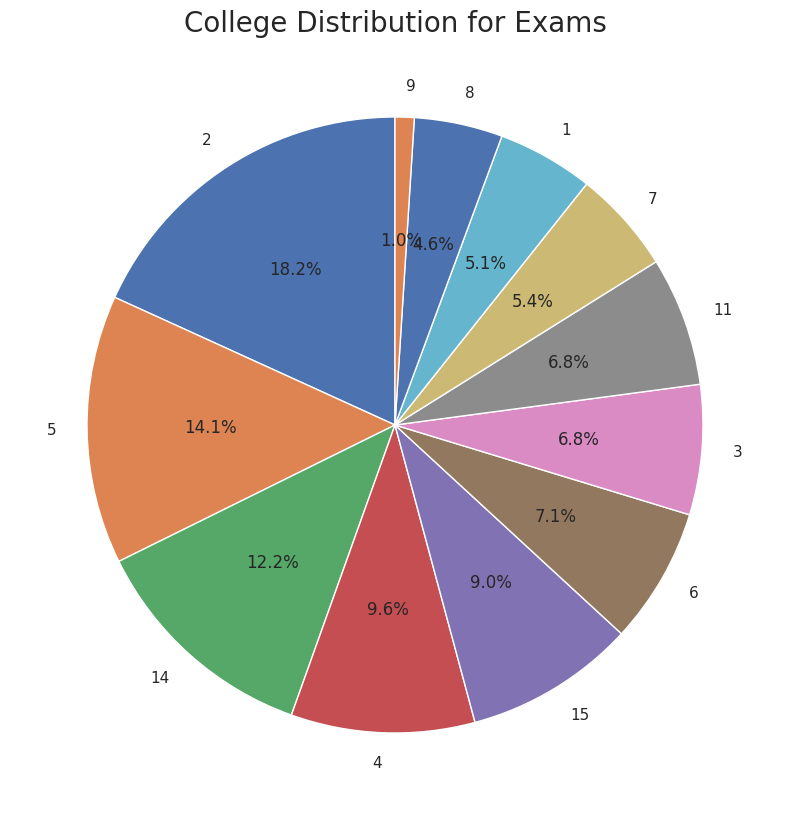

In [110]:


sns.set_theme(style="whitegrid")

college_counts = exams['COL'].value_counts()

plt.figure(figsize=(15, 10))
plt.pie(college_counts, labels=college_counts.index, autopct="%1.1f%%", startangle=90)
plt.title('College Distribution for Exams', fontsize=20)
plt.show()


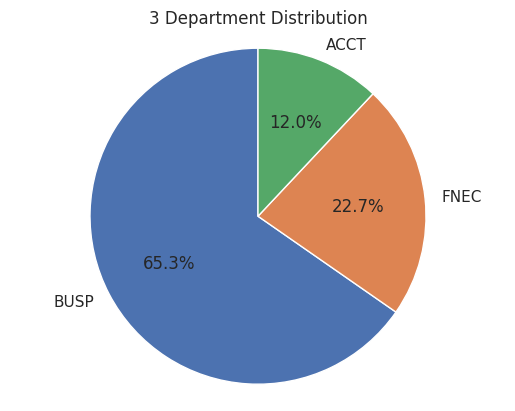

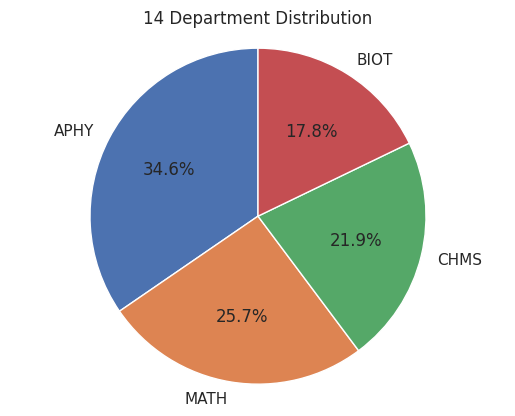

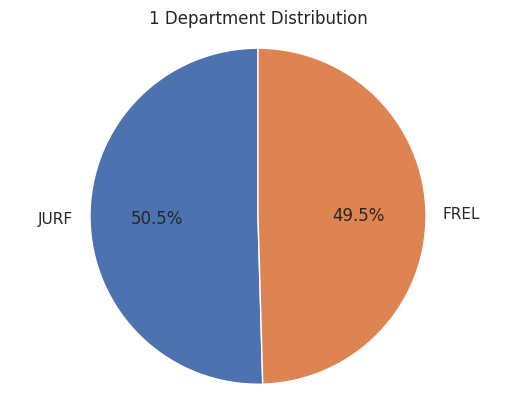

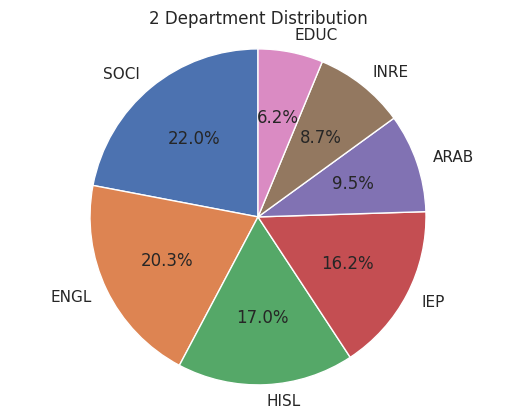

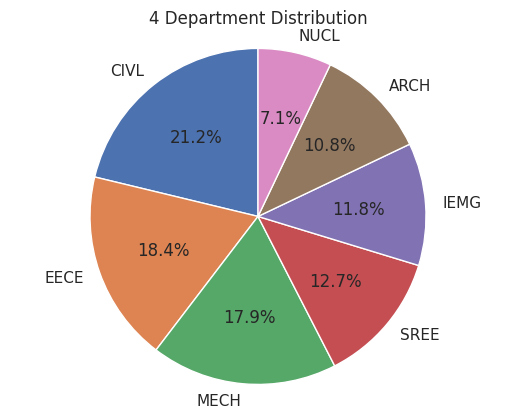

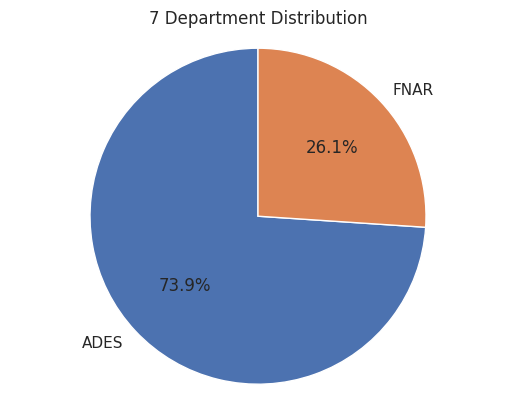

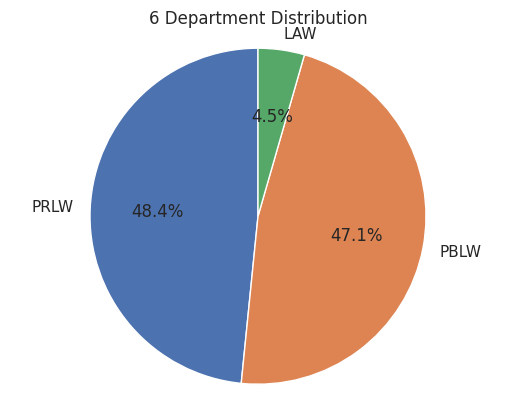

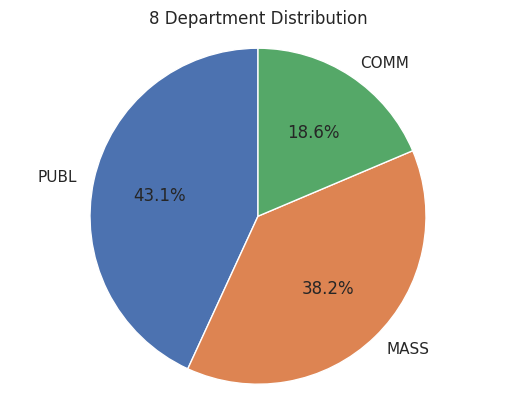

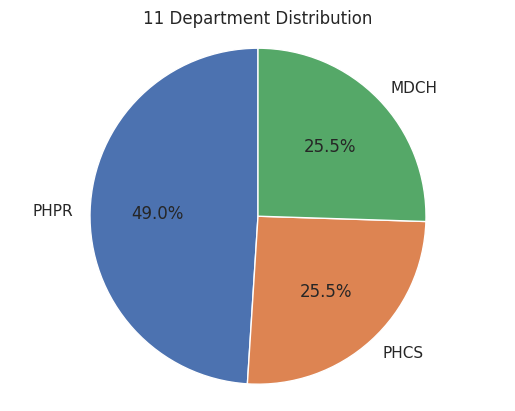

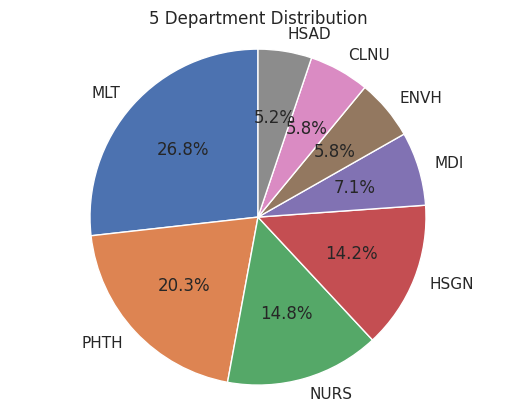

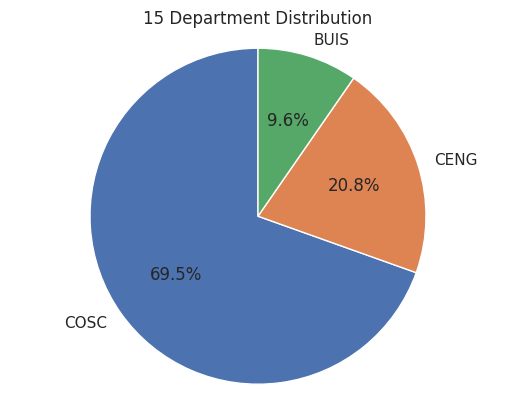

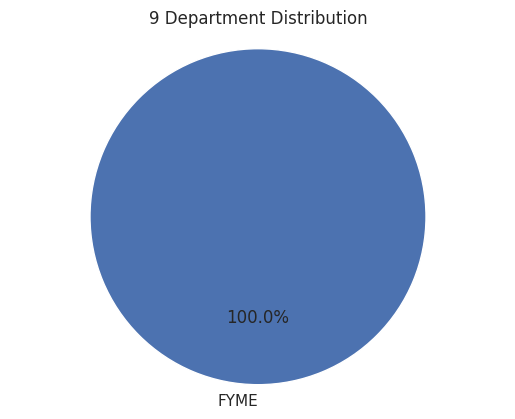

In [111]:
# for each college, show a pie chart for their department

for college in exams['COL'].unique():
  college_data = exams[exams['COL'] == college]
  labels = college_data['DEPT'].value_counts().index.to_list()
  sizes = college_data['DEPT'].value_counts().to_numpy()
  fig, ax = plt.subplots()
  ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
  ax.axis('equal')
  plt.title(f'{college} Department Distribution')
  plt.show()


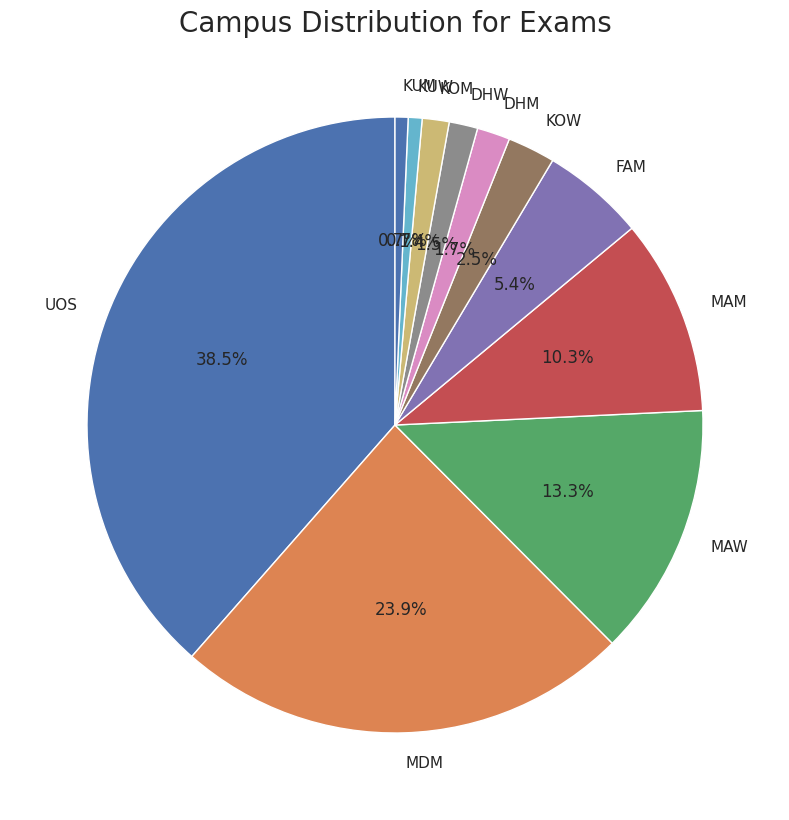

In [112]:
# prompt: create piechart for Campus (CAMP)

campus_counts = exams['CAMP'].value_counts()

plt.figure(figsize=(15, 10))
plt.pie(campus_counts, labels=campus_counts.index, autopct="%1.1f%%", startangle=90)
plt.title('Campus Distribution for Exams', fontsize=20)
plt.show()


In [113]:
# Defining the list of campuses to keep
valid_campuses = ['UOS', 'MAW', 'MAM', 'MDW', 'MDM']

# Filter the DataFrame in-place to keep only rows with these campuses
exams = exams[exams['CAMP'].isin(valid_campuses)]

# Display the DataFrame
print(exams)

        id  COL  DEPT    CRN   CRS_NO                           TITLE SECT  \
0        1    3  BUSP  20675   302250   Legal Environment of Business   53   
1        2   14  BIOT  20567  1450301                 Bio-informatics  53L   
2        3   14  BIOT  20564  1450301                 Bio-informatics  11L   
3        4   14  BIOT  20558  1450421             Plant Biotechnology  13L   
4        5   14  BIOT  20559  1450421             Plant Biotechnology  11L   
...    ...  ...   ...    ...      ...                             ...  ...   
2193  2194    6  PBLW  20949   602347                  Public Finance   51   
2194  2195   14  APHY  20743  1430106                Remedial Physics  52Z   
2195  2196    6  PBLW  20876   602271  Princpl of Admin Law &Pub Func    1   
2196  2197   14  APHY  20828  1460224                Regional Geology   11   
2197  2198    5  NURS  20927   503261  Psychosocial Aspects/ Hth Prof   71   

     TYPE_ CAMP  ENROL INSTR_ID                            INST

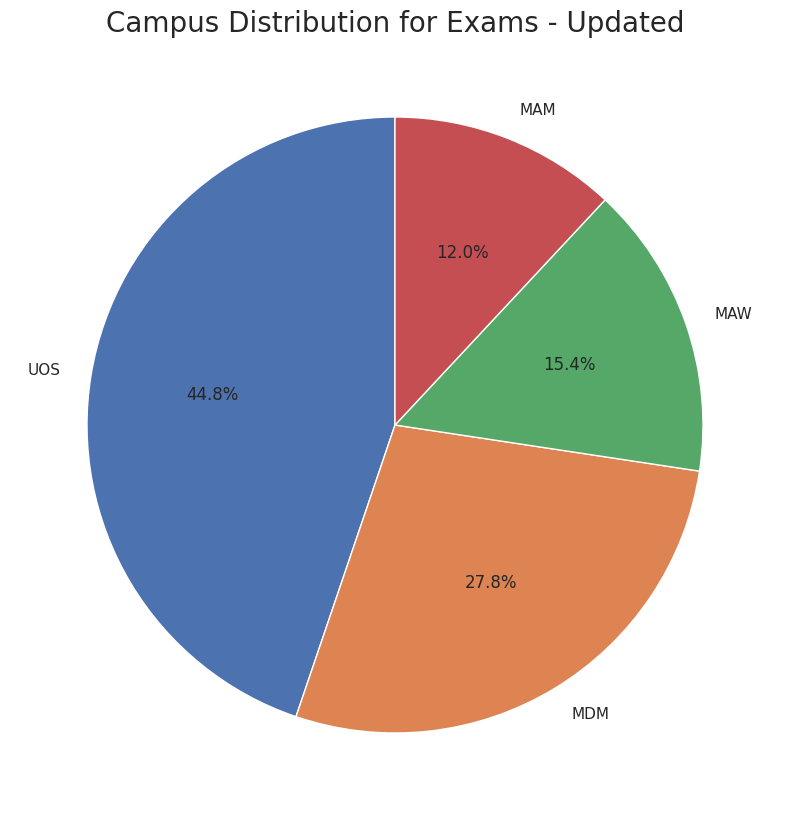

In [114]:
# prompt: create piechart for Campus (CAMP)

campus_counts = exams['CAMP'].value_counts()

plt.figure(figsize=(15, 10))
plt.pie(campus_counts, labels=campus_counts.index, autopct="%1.1f%%", startangle=90)
plt.title('Campus Distribution for Exams - Updated', fontsize=20)
plt.show()


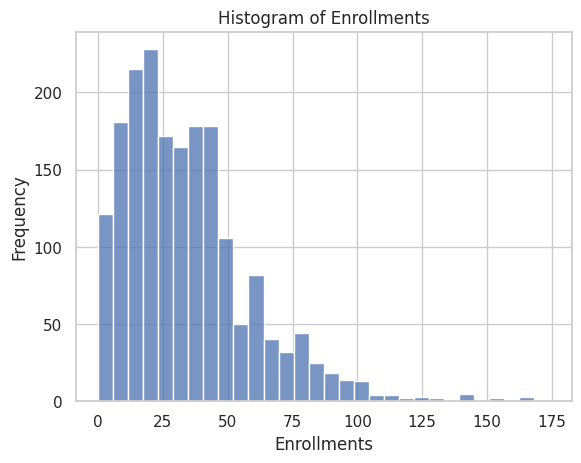

In [115]:
# prompt: create a histogram for enrollments (enrol)

sns.histplot(data=exams, x="ENROL", bins=30)
plt.xlabel("Enrollments")
plt.ylabel("Frequency")
plt.title("Histogram of Enrollments")
plt.show()


In [116]:
exam_enrollments = exams['ENROL']

# Calculate descriptive statistics for enrollments
enrollment_stats = exam_enrollments.describe()

# Print the enrollment statistics
print(enrollment_stats)


count    1891.000000
mean       34.544157
std        25.251487
min         0.000000
25%        16.000000
50%        30.000000
75%        46.000000
max       174.000000
Name: ENROL, dtype: float64


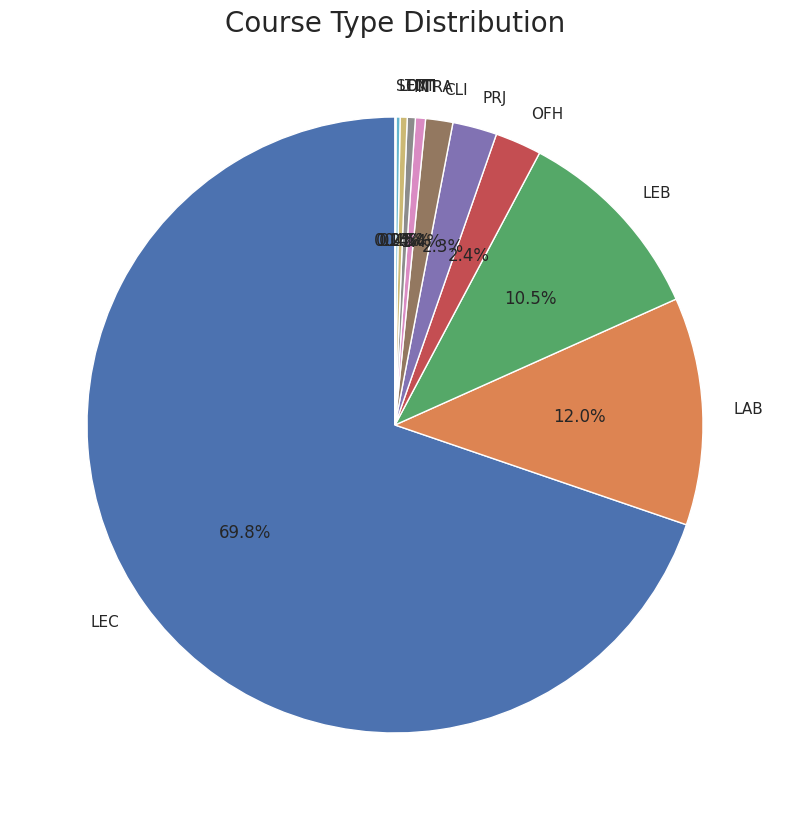

In [117]:
# prompt: create piechart based on course type_

course_type_counts = exams['TYPE_'].value_counts()

plt.figure(figsize=(15, 10))
plt.pie(course_type_counts, labels=course_type_counts.index, autopct="%1.1f%%", startangle=90)
plt.title('Course Type Distribution', fontsize=20)
plt.show()


In [118]:
# prompt: keep only LEC TYPE_

x = ['LEC', 'LAB', 'LEB']

exams = exams[exams['TYPE_'].isin(x)]

print(exams)

        id  COL  DEPT    CRN   CRS_NO                           TITLE SECT  \
0        1    3  BUSP  20675   302250   Legal Environment of Business   53   
1        2   14  BIOT  20567  1450301                 Bio-informatics  53L   
2        3   14  BIOT  20564  1450301                 Bio-informatics  11L   
3        4   14  BIOT  20558  1450421             Plant Biotechnology  13L   
4        5   14  BIOT  20559  1450421             Plant Biotechnology  11L   
...    ...  ...   ...    ...      ...                             ...  ...   
2193  2194    6  PBLW  20949   602347                  Public Finance   51   
2194  2195   14  APHY  20743  1430106                Remedial Physics  52Z   
2195  2196    6  PBLW  20876   602271  Princpl of Admin Law &Pub Func    1   
2196  2197   14  APHY  20828  1460224                Regional Geology   11   
2197  2198    5  NURS  20927   503261  Psychosocial Aspects/ Hth Prof   71   

     TYPE_ CAMP  ENROL INSTR_ID                            INST

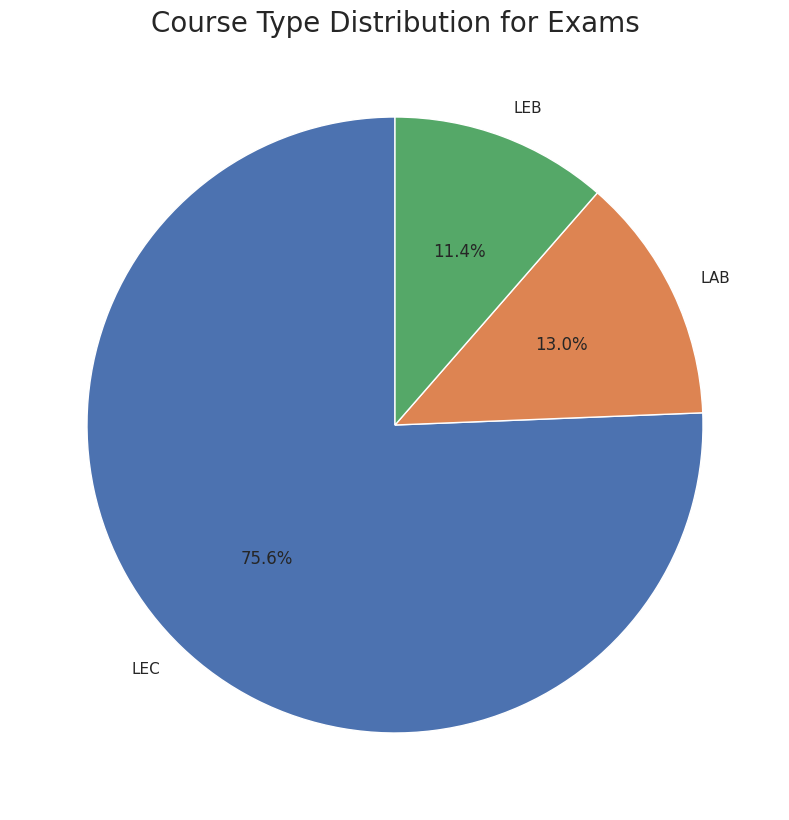

In [119]:
# prompt: create piechart based on course type_

course_type_counts = exams['TYPE_'].value_counts()

plt.figure(figsize=(15, 10))
plt.pie(course_type_counts, labels=course_type_counts.index, autopct="%1.1f%%", startangle=90)
plt.title('Course Type Distribution for Exams', fontsize=20)
plt.show()


In [120]:
# prompt: how many dept PHCS are there?

dept_counts = exams['DEPT'].value_counts()

# Get the count for the 'PHCS' department
phcs_count = dept_counts.get('PHCS', 0)

# Print the count
print(f"Number of exams in the 'PHCS' department: {phcs_count}")


Number of exams in the 'PHCS' department: 29


#downloading the csv files

In [127]:
# prompt: allow downloading exams as csv

from google.colab import files

# Download the exams DataFrame as a CSV file
exams.to_csv('exams.csv', index=False)

# Download the exam_rooms DataFrame as a CSV file
exam_rooms.to_csv('exam_rooms.csv', index=False)

# Make the downloaded files available for download
files.download('exams.csv')
files.download('exam_rooms.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>